In [1]:
#선형 회귀분석을 하기 위한 코드
#좌표 값들을 생성하기 위해서 numpy 패키지를 불러옵니다.
import numpy as np

In [2]:
#5000개의 데이터 포인트를 만듭니다.
num_points = 5000
vectors_set = []

In [3]:
# x1은 평균값을 0으로 갖고 표준편차가 0.55인 정규분포를 생성합니다.
# y1은 x1의 데이터를 이용해 기울기는 0.1, y 절편은 0.3인 방정식을 이용해 만듭니다.
# 이때 y 절편에 평균값 0, 표준편차 0.03인 정규분포를 더하여 포인트를 방정식이 만드는 직선의 y축 방향으로 흩어지게 만듭니다.
for i in range(num_points):
    x1 = np.random.normal(0.1, 0.3)
    y1 = x1 * 0.1+ 0.3 + np.random.normal(0.0, 0.03)
    vectors_set.append([x1, y1])

In [4]:
#vectors_set는 list of list, 즉 2차원 배열로 이루어져 있습니다.
#2차원의 첫번째 요소를 x_data에 두번째 요소를 y_data로 저장합니다.
x_data = [v[0] for v in vectors_set]
y_data = [v[1] for v in vectors_set]

In [5]:
#그레프를 그리기 위해서 불러오는 패키지
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(*args, **kw)>

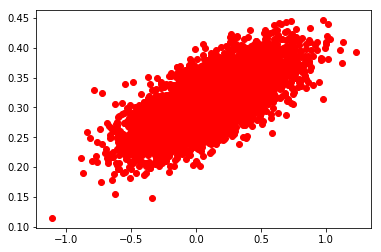

In [6]:
#앞서 생성한 좌표들을 시각화 시키는 코드입니다
#x, y 좌표에 x_data, y_data 를 사용하여 붉은색 원으로 산포도를 그립니다.
plt.plot(x_data, y_data, 'ro')
plt.show

In [7]:
#입력 데이터 x_data로부터 출력 값 y를 추론 할 수 있는 학습 알고리즘을 훈련시키는 코드입니다
#이 모델이 선형회귀입니다.

#최적의 매개변수 W와 b를 찾도록 만드는 것이 목적입니다.
#직선으로 이를 나태나면 y_data = W * x_data + b으로 표현 할 수 있습니다.

#여기서 정확한 결과 값을 얻기 위해 여러번 반복 과정이 일어나며, 이 과정을 통해 얼마나 개선이 되고있는지를 확인합니다.
#이 좋고, 나쁘고의 개선 정도를 측정하는 것이 비용함수 또는 오차함수라고 합니다.

#이 코드에서는 비용함수로 평균제곱오차(Mean Square Error)를 사용합니다.
#평균제곱오차는 실제 값과 알고리즘이 반복마다 추정한 값 사이의 거리를 오차로 하는 값의 평균입니다.

In [8]:
import tensorflow as tf

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [9]:
#-1~1 사이의 랜덤한 균등분포 값으로 1차원 엘리먼트가 한개인 가중치 텐서를 만듭니다.
#바이어스 텐서는 0으로 초기화된 엘리먼트를 갖는 1차원 텐서입니다.
W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.zeros([1]))
y = W * x_data + b

In [10]:
#비용 함수를 선언합니다.
loss = tf.reduce_mean(tf.square(y-y_data))

In [11]:
#최적화 방법은 학습속도 0.5인 그래디언트 디센트를 사용합니다.
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

In [12]:
train = optimizer.minimize(loss)

In [13]:
#모든 변수를 초기화하고 세션을 시작합니다.
init = tf.global_variables_initializer()

In [14]:
sess = tf.Session()
sess.run(init)

0 [-0.5922881] [0.383564] 0.0455323


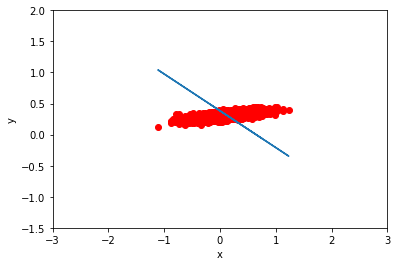

1 [-0.5292765] [0.37174037] 0.037708342


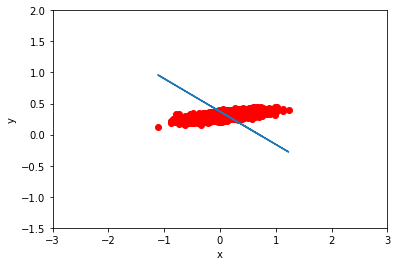

2 [-0.47156128] [0.36523184] 0.03127086


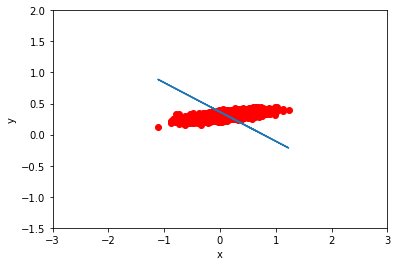

3 [-0.41914362] [0.3592704] 0.025959741


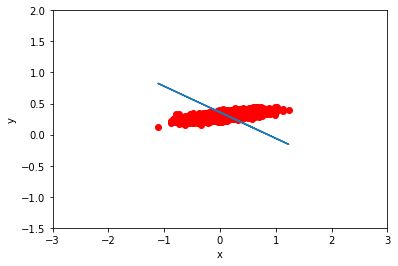

4 [-0.37153205] [0.35385612] 0.021577928


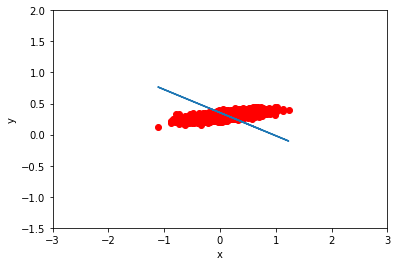

5 [-0.32828596] [0.34893826] 0.017962804


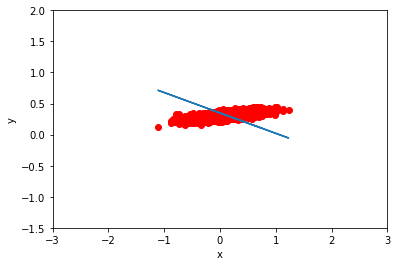

6 [-0.2890051] [0.34447134] 0.0149802305


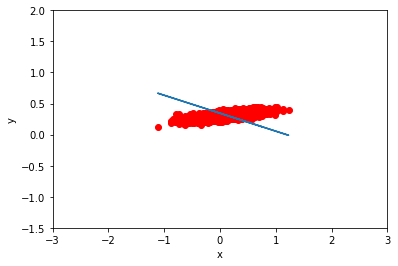

7 [-0.25332588] [0.340414] 0.01251952


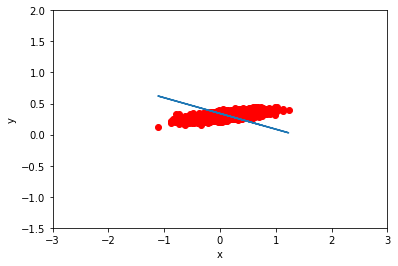

8 [-0.22091809] [0.33672863] 0.010489373


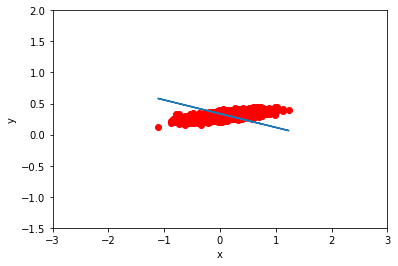

9 [-0.19148175] [0.3333812] 0.008814444


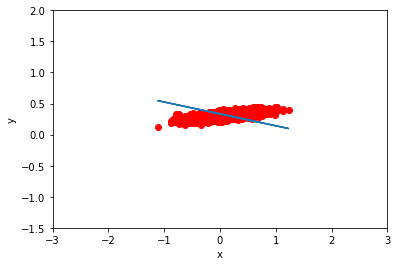

10 [-0.16474442] [0.33034068] 0.007432583


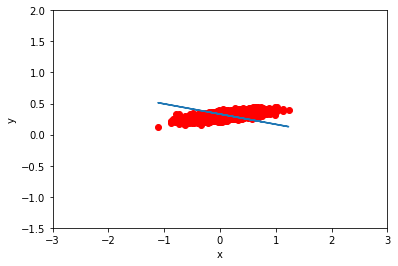

11 [-0.14045864] [0.32757896] 0.0062925066


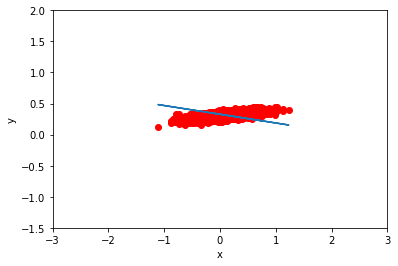

12 [-0.11839963] [0.32507047] 0.005351915


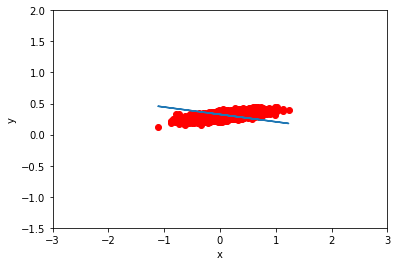

13 [-0.09836319] [0.32279196] 0.004575901


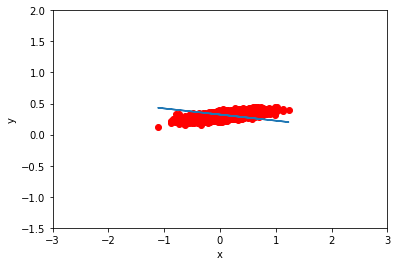

14 [-0.0801639] [0.32072237] 0.003935666


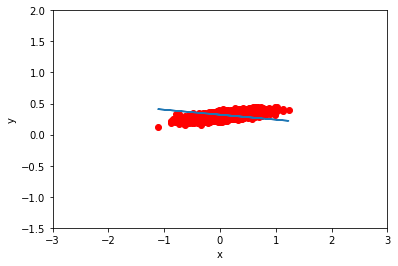

In [15]:
#15번 반복하면서 train을 실행시킵니다.
#반복마다 W, b 값의 변화를 프린트하고 그래프로 직선의 기울기의 변화를 살펴봅니다.
for step in range(15):
    sess.run(train)
    print(step, sess.run(W), sess.run(b), sess.run(loss))
    # 산포도 그리기
    
    plt.plot(x_data, y_data, 'ro')
    # 직선 그리기
    
    plt.plot(x_data, sess.run(W) * x_data + sess.run(b))
    # x, y 축 레이블링을 하고 각 축의 최대, 최소값 범위를 지정합니다.
    
    plt.xlabel('x')
    plt.xlim(-3,3)
    plt.ylim(-1.5,2)
    plt.ylabel('y')
    plt.show()